In [31]:
import pandas as pd
df = pd.read_excel("Values of Biomass NDVI Carbon sequestration.xlsx")

In [32]:
df.head()

,S/N,Biomass_2004,Biomass_2014,Biomass_2024,Carbon_2004,Carbon_2014,Carbon_2024,NDVI_2004,NDVI_2014,NDVI_2024
0,1,63.04337,40.04917,43.72679,31.52168,20.02459,21.8634,0.620289,0.466994,0.491512
1,2,65.21633,40.13993,57.79374,32.60817,20.06996,28.89687,0.634776,0.4676,0.585292
2,3,48.54525,32.6473,24.10048,24.27262,16.32365,12.05024,0.523635,0.417649,0.36067
3,4,42.73759,35.8119,36.40771,21.3688,17.90595,18.20386,0.484917,0.438746,0.442718
4,5,67.8181,42.25975,0,33.90905,21.12988,0,0.652121,0.481732,-0.088153


In [33]:
df.dtypes

S/N              int64
Biomass_2004    object
Biomass_2014    object
Biomass_2024    object
Carbon_2004     object
Carbon_2014     object
Carbon_2024     object
NDVI_2004       object
NDVI_2014       object
NDVI_2024       object
dtype: object

In [52]:
# Selected columns for analysis
columns = ['Biomass_2004', 'Biomass_2014', 'Biomass_2024', 'Carbon_2004', 'Carbon_2014', 'Carbon_2024', 'NDVI_2004', 'NDVI_2014', 'NDVI_2024']

# Convert columns to numeric
for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [53]:
# Confirm NaN values
print(df[columns].isna().sum())

Biomass_2004    1
Biomass_2014    1
Biomass_2024    1
Carbon_2004     1
Carbon_2014     1
Carbon_2024     1
NDVI_2004       1
NDVI_2014       1
NDVI_2024       1
dtype: int64


In [54]:
# Remove rows with any NaN in the selected columns
df = df.dropna(subset=columns)

# Confirm no NaN values remain
print(df_cleaned[columns].isna().sum())

Biomass_2004    0
Biomass_2014    0
Biomass_2024    0
Carbon_2004     0
Carbon_2014     0
Carbon_2024     0
NDVI_2004       0
NDVI_2014       0
NDVI_2024       0
dtype: int64


In [55]:
# Compute descriptive statistics
descriptives = df[columns].describe().round(3)

print(descriptives)

,Biomass_2004,Biomass_2014,Biomass_2024,Carbon_2004,Carbon_2014,Carbon_2024,NDVI_2004,NDVI_2014,NDVI_2024
count,1172.000,1172.000,1172.000,1172.000,1172.000,1172.000,1172.000,1172.000,1172.000
mean,33.952,39.786,32.392,16.976,19.893,16.196,0.426,0.464,0.414
std,16.866,20.617,19.432,8.433,10.309,9.716,0.113,0.137,0.132
min,0.000,0.553,0.000,0.000,0.276,0.000,0.150,0.180,-0.088
25%,22.050,24.800,18.889,11.025,12.400,9.444,0.347,0.366,0.326
50%,31.920,35.809,29.672,15.960,17.904,14.836,0.413,0.439,0.394
75%,44.230,53.288,42.982,22.115,26.644,21.491,0.495,0.552,0.486
max,88.844,96.106,91.842,44.422,48.053,45.921,0.792,0.841,0.812


In [59]:
from scipy.stats import f_oneway

# Melt data for ANOVA
df_melt_biomass = pd.melt(df, id_vars=['S/N'], value_vars=['Biomass_2004', 'Biomass_2014', 'Biomass_2024'], var_name='Year', value_name='Biomass')
df_melt_carbon = pd.melt(df, id_vars=['S/N'], value_vars=['Carbon_2004', 'Carbon_2014', 'Carbon_2024'], 
                         var_name='Year', value_name='Carbon')
df_melt_ndvi = pd.melt(df, id_vars=['S/N'], value_vars=['NDVI_2004', 'NDVI_2014', 'NDVI_2024'], 
                       var_name='Year', value_name='NDVI')

# ANOVA for Biomass
biomass_anova = f_oneway(
    df_melt_biomass[df_melt_biomass['Year'] == 'Biomass_2004']['Biomass'].dropna(),
    df_melt_biomass[df_melt_biomass['Year'] == 'Biomass_2014']['Biomass'].dropna(),
    df_melt_biomass[df_melt_biomass['Year'] == 'Biomass_2024']['Biomass'].dropna()
)
print("\nANOVA for Biomass:")
print(f"F-statistic: {biomass_anova.statistic:.3f}, p-value: {biomass_anova.pvalue:.3f}")

# ANOVA for Carbon Sequestration
carbon_anova = f_oneway(
    df_melt_carbon[df_melt_carbon['Year'] == 'Carbon_2004']['Carbon'].dropna(),
    df_melt_carbon[df_melt_carbon['Year'] == 'Carbon_2014']['Carbon'].dropna(),
    df_melt_carbon[df_melt_carbon['Year'] == 'Carbon_2024']['Carbon'].dropna()
)
print("\nANOVA for Carbon Sequestration:")
print(f"F-statistic: {carbon_anova.statistic:.3f}, p-value: {carbon_anova.pvalue:.3f}")

# ANOVA for NDVI
ndvi_anova = f_oneway(
    df_melt_ndvi[df_melt_ndvi['Year'] == 'NDVI_2004']['NDVI'].dropna(),
    df_melt_ndvi[df_melt_ndvi['Year'] == 'NDVI_2014']['NDVI'].dropna(),
    df_melt_ndvi[df_melt_ndvi['Year'] == 'NDVI_2024']['NDVI'].dropna()
)
print("\nANOVA for NDVI:")
print(f"F-statistic: {ndvi_anova.statistic:.3f}, p-value: {ndvi_anova.pvalue:.3f}")

# Save ANOVA results to CSV
anova_results = pd.DataFrame({
    'Variable': ['Biomass', 'Carbon Sequestration', 'NDVI'],
    'F-statistic': [biomass_anova.statistic, carbon_anova.statistic, ndvi_anova.statistic],
    'p-value': [biomass_anova.pvalue, carbon_anova.pvalue, ndvi_anova.pvalue]
}).round(3)
anova_results.to_csv("anova_results.csv", index=False)
print("\nANOVA results saved to 'anova_results.csv'")


ANOVA for Biomass:
F-statistic: 49.129, p-value: 0.000


In [60]:
# ANOVA for Carbon Sequestration
carbon_anova = f_oneway(
    df_melt_carbon[df_melt_carbon['Year'] == 'Carbon_2004']['Carbon'].dropna(),
    df_melt_carbon[df_melt_carbon['Year'] == 'Carbon_2014']['Carbon'].dropna(),
    df_melt_carbon[df_melt_carbon['Year'] == 'Carbon_2024']['Carbon'].dropna()
)
print("\nANOVA for Carbon Sequestration:")
print(f"F-statistic: {carbon_anova.statistic:.3f}, p-value: {carbon_anova.pvalue:.3f}")


ANOVA for Carbon Sequestration:
F-statistic: 49.129, p-value: 0.000


In [61]:
# ANOVA for NDVI
ndvi_anova = f_oneway(
    df_melt_ndvi[df_melt_ndvi['Year'] == 'NDVI_2004']['NDVI'].dropna(),
    df_melt_ndvi[df_melt_ndvi['Year'] == 'NDVI_2014']['NDVI'].dropna(),
    df_melt_ndvi[df_melt_ndvi['Year'] == 'NDVI_2024']['NDVI'].dropna()
)
print("\nANOVA for NDVI:")
print(f"F-statistic: {ndvi_anova.statistic:.3f}, p-value: {ndvi_anova.pvalue:.3f}")


ANOVA for NDVI:
F-statistic: 49.177, p-value: 0.000


In [90]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Melt data for ANOVA
df_melt_biomass = pd.melt(df, id_vars=['S/N'], value_vars=['Biomass_2004', 'Biomass_2014', 'Biomass_2024'], var_name='Year', value_name='Biomass')
df_melt_carbon = pd.melt(df, id_vars=['S/N'], value_vars=['Carbon_2004', 'Carbon_2014', 'Carbon_2024'], var_name='Year', value_name='Carbon')
df_melt_ndvi = pd.melt(df, id_vars=['S/N'], value_vars=['NDVI_2004', 'NDVI_2014', 'NDVI_2024'], var_name='Year', value_name='NDVI')

# Function to perform ANOVA and print the full table
def run_anova_and_print(melted_df, value_var, group_var, title):
    """
    Runs a one-way ANOVA and prints the full table.
    """
    #Drop rows where the value is NaN
    data_for_anova = melted_df[[value_var, group_var]].dropna()
    
    # Fit the model. The formula is: [Value] ~ C([Group])
    model = ols(f'{value_var} ~ C({group_var})', data=data_for_anova).fit()
    
    # Perform the ANOVA. Use typ=2 for Type II Sum of Squares.
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Print results
    print(f"\n{title}")
    print("=" * 50)
    print(anova_table)
    
    # Extract the F-statistic and p-value for the group effect to compare with scipy
    f_stat = anova_table['F']['C(' + group_var + ')']
    p_value = anova_table['PR(>F)']['C(' + group_var + ')']
    print(f"\nF-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

# Run the ANOVA for each variable
run_anova_and_print(df_melt_biomass, 'Biomass', 'Year', "ANOVA for Biomass")
run_anova_and_print(df_melt_carbon, 'Carbon', 'Year', "ANOVA for Carbon Sequestration")
run_anova_and_print(df_melt_ndvi, 'NDVI', 'Year', "ANOVA for NDVI")
    


ANOVA for Biomass
                sum_sq      df          F        PR(>F)
C(Year)   3.560658e+04     2.0  49.128564  9.050428e-22
Residual  1.273047e+06  3513.0        NaN           NaN

F-statistic: 49.129, p-value: 0.000

ANOVA for Carbon Sequestration
                 sum_sq      df          F        PR(>F)
C(Year)     8901.646419     2.0  49.128565  9.050420e-22
Residual  318261.724934  3513.0        NaN           NaN

F-statistic: 49.129, p-value: 0.000

ANOVA for NDVI
             sum_sq      df          F        PR(>F)
C(Year)    1.605280     2.0  49.176541  8.637748e-22
Residual  57.337789  3513.0        NaN           NaN

F-statistic: 49.177, p-value: 0.000


In [64]:
# Tukey HSD for Biomass
tukey_biomass = pairwise_tukeyhsd(endog=df_melt_biomass['Biomass'], groups=df_melt_biomass['Year'], alpha=0.05)

print("\nTukey HSD for Biomass:")
print(tukey_biomass)


Tukey HSD for Biomass:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
Biomass_2004 Biomass_2014   5.8342    0.0  3.9903   7.678   True
Biomass_2004 Biomass_2024  -1.5599 0.1164 -3.4037  0.2839  False
Biomass_2014 Biomass_2024  -7.3941    0.0 -9.2379 -5.5502   True
----------------------------------------------------------------


In [65]:
# Tukey HSD for Carbon Sequestration
tukey_carbon = pairwise_tukeyhsd(endog=df_melt_carbon['Carbon'], groups=df_melt_carbon['Year'], alpha=0.05)

print("\nTukey HSD for Carbon Sequestration:")
print(tukey_carbon)


Tukey HSD for Carbon Sequestration:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
Carbon_2004 Carbon_2014   2.9171    0.0  1.9952   3.839   True
Carbon_2004 Carbon_2024    -0.78 0.1164 -1.7019   0.142  False
Carbon_2014 Carbon_2024   -3.697    0.0  -4.619 -2.7751   True
--------------------------------------------------------------


In [66]:
# Tukey HSD for NDVI
tukey_ndvi = pairwise_tukeyhsd(endog=df_melt_ndvi['NDVI'], groups=df_melt_ndvi['Year'], alpha=0.05)

print("\nTukey HSD for NDVI:")
print(tukey_ndvi)


Tukey HSD for NDVI:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
NDVI_2004 NDVI_2014   0.0383    0.0  0.0259  0.0506   True
NDVI_2004 NDVI_2024  -0.0118 0.0656 -0.0242  0.0006  False
NDVI_2014 NDVI_2024  -0.0501    0.0 -0.0624 -0.0377   True
----------------------------------------------------------


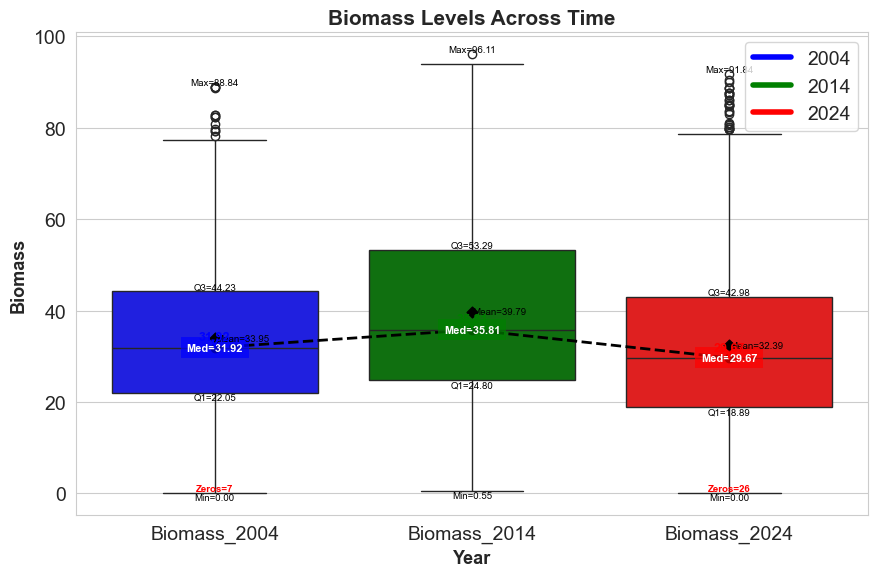

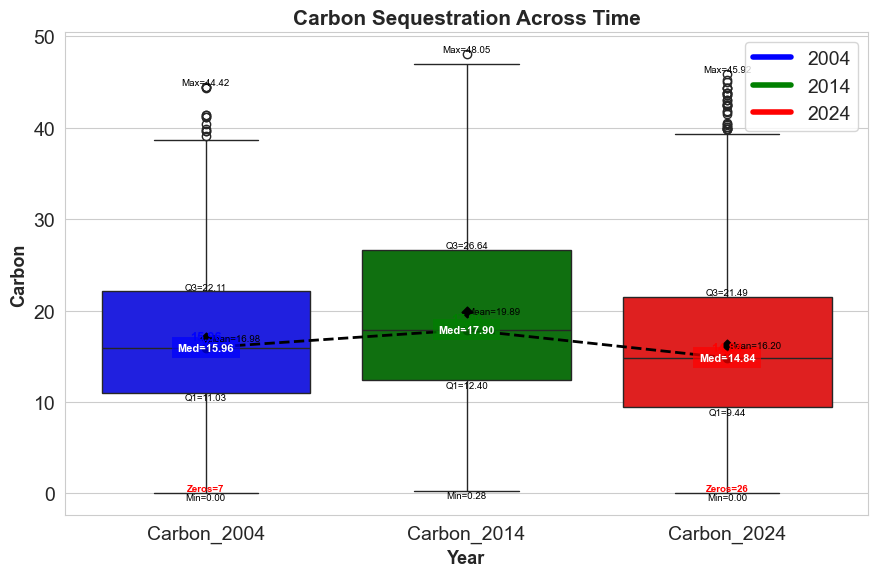

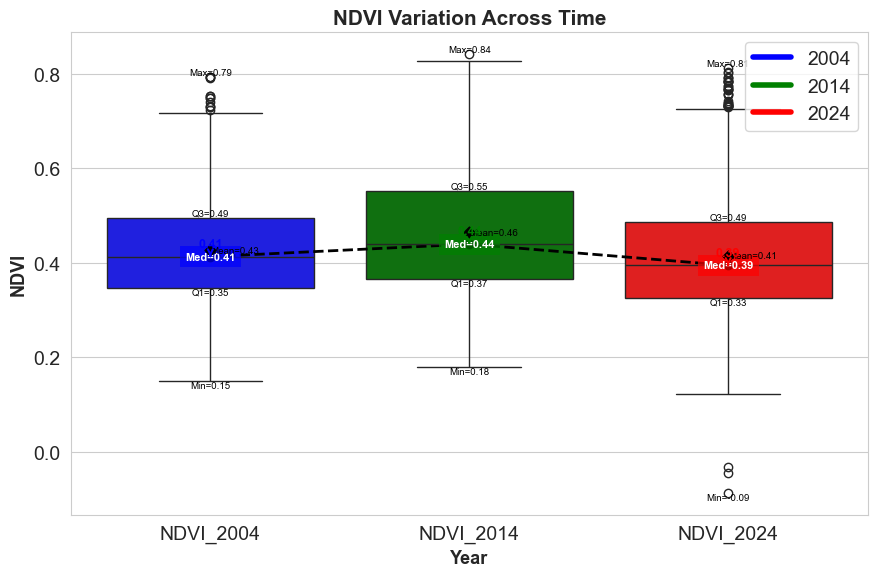

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# Configure plotting aesthetics
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 14

# Color scheme for different observation years
colors = {
    'Biomass_2004': 'blue', 'Biomass_2014': 'green', 'Biomass_2024': 'red',
    'Carbon_2004': 'blue', 'Carbon_2014': 'green', 'Carbon_2024': 'red',
    'NDVI_2004': 'blue', 'NDVI_2014': 'green', 'NDVI_2024': 'red'
}

def generate_boxplot(variables, title, ylabel, filename):
    """Boxplot with annotated descriptive statistics and median trend line."""
    plt.figure(figsize=(9, 6))
    ax = sns.boxplot(data=df[variables], palette=[colors[v] for v in variables])
    
    plt.xlabel("Year", fontsize=13, fontweight='bold')
    plt.ylabel(ylabel, fontsize=13, fontweight='bold')
    plt.title(title, fontsize=15, fontweight='bold')
    
    # Legend
    legend_elements = [
        Line2D([0], [0], color='blue', lw=4, label='2004'),
        Line2D([0], [0], color='green', lw=4, label='2014'),
        Line2D([0], [0], color='red', lw=4, label='2024')
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    # Annotate statistics
    medians = df[variables].median()
    x_pos = np.arange(len(variables))
    
    for idx, var in enumerate(variables):
        series = df[var].dropna()
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        med = series.median()
        mean = series.mean()
        min_val = series.min()
        max_val = series.max()
        zeros = (series == 0).sum()
        
        # Quartiles & median inside the box
        plt.text(idx, med, f'Med={med:.2f}', ha='center', va='center',
                 fontsize=8, color='white', fontweight='bold',
                 bbox=dict(facecolor=colors[var], edgecolor='none', alpha=0.7))
        plt.text(idx, q1, f'Q1={q1:.2f}', ha='center', va='top',
                 fontsize=7, color='black')
        plt.text(idx, q3, f'Q3={q3:.2f}', ha='center', va='bottom',
                 fontsize=7, color='black')
        
        # Whiskers / range
        plt.text(idx, min_val, f'Min={min_val:.2f}', ha='center', va='top',
                 fontsize=7, color='black')
        plt.text(idx, max_val, f'Max={max_val:.2f}', ha='center', va='bottom',
                 fontsize=7, color='black')
        
        # Mean marker
        plt.scatter(idx, mean, color='black', marker='D', s=30, zorder=3)
        plt.text(idx, mean, f'Mean={mean:.2f}', ha='left', va='center',
                 fontsize=7, color='black')
        
        # Zero count if relevant
        if zeros > 0:
            plt.text(idx, min_val, f'Zeros={zeros}', ha='center', va='bottom',
                     fontsize=7, color='red', fontweight='bold')
        
        # Median annotation with arrow
        plt.annotate(f'{med:.2f}', xy=(idx, med), xytext=(idx, med + (0.05 * med)),
                     ha='center', fontsize=9, color=colors[var], fontweight='bold',
                     arrowprops=dict(arrowstyle='->', color=colors[var], lw=1.5))

    # Connect medians with dashed trend line
    plt.plot(x_pos, medians.values, color='black', linestyle='--', marker='o',
             linewidth=2, label='Median Trend')

    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


# Generate boxplots
generate_boxplot(['Biomass_2004', 'Biomass_2014', 'Biomass_2024'],
                 "Biomass Levels Across Time", "Biomass", "biomass_boxplot.png")

generate_boxplot(['Carbon_2004', 'Carbon_2014', 'Carbon_2024'],
                 "Carbon Sequestration Across Time", "Carbon", "carbon_boxplot.png")

generate_boxplot(['NDVI_2004', 'NDVI_2014', 'NDVI_2024'],
                 "NDVI Variation Across Time", "NDVI", "ndvi_boxplot.png")


In [75]:
# Correlation for 2004
corr_2004 = df[['Biomass_2004', 'Carbon_2004', 'NDVI_2004']].corr()
print("\nCorrelation Matrix for 2004:")
print(corr_2004.round(3))

# Correlation for 2014
corr_2014 = df[['Biomass_2014', 'Carbon_2014', 'NDVI_2014']].corr()
print("\nCorrelation Matrix for 2014:")
print(corr_2014.round(3))

# Correlation for 2024
corr_2024 = df[['Biomass_2024', 'Carbon_2024', 'NDVI_2024']].corr()
print("\nCorrelation Matrix for 2024:")
print(corr_2024.round(3))


Correlation Matrix for 2004:
              Biomass_2004  Carbon_2004  NDVI_2004
Biomass_2004           1.0          1.0        1.0
Carbon_2004            1.0          1.0        1.0
NDVI_2004              1.0          1.0        1.0

Correlation Matrix for 2014:
              Biomass_2014  Carbon_2014  NDVI_2014
Biomass_2014         1.000        1.000      0.948
Carbon_2014          1.000        1.000      0.948
NDVI_2014            0.948        0.948      1.000

Correlation Matrix for 2024:
              Biomass_2024  Carbon_2024  NDVI_2024
Biomass_2024         1.000        1.000      0.945
Carbon_2024          1.000        1.000      0.945
NDVI_2024            0.945        0.945      1.000


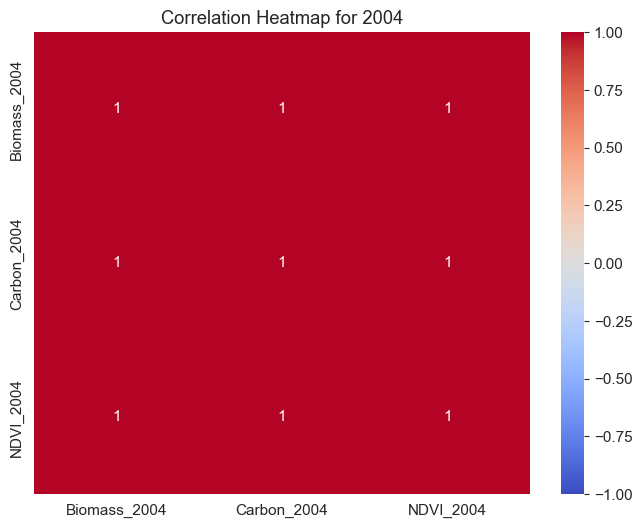

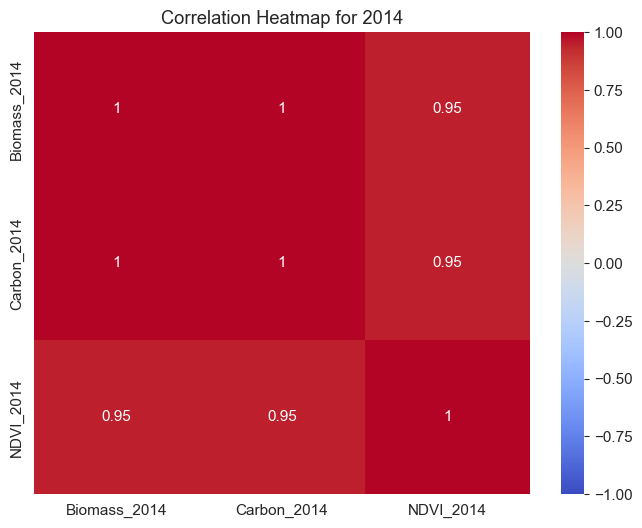

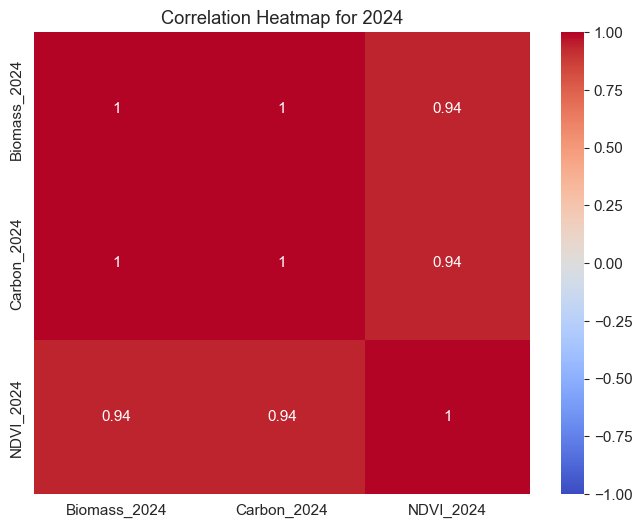

In [80]:
# Heatmaps for 2004
plt.figure(figsize=(8, 6))
sns.heatmap(corr_2004, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for 2004")
plt.savefig("heatmap_2004.png")
plt.show()

# Heatmaps for 2014
plt.figure(figsize=(8, 6))
sns.heatmap(corr_2014, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for 2014")
plt.savefig("heatmap_2014.png")
plt.show()

# Heatmap for 2024
plt.figure(figsize=(8, 6))
sns.heatmap(corr_2024, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for 2024")
plt.savefig("heatmap_2024.png")
plt.show()


Regression Summary for Carbon_2004 ~ NDVI_2004 (2004):
                            OLS Regression Results                            
Dep. Variable:            Carbon_2004   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.293e+06
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:08:11   Log-Likelihood:                 493.26
No. Observations:                1172   AIC:                            -982.5
Df Residuals:                    1170   BIC:                            -972.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

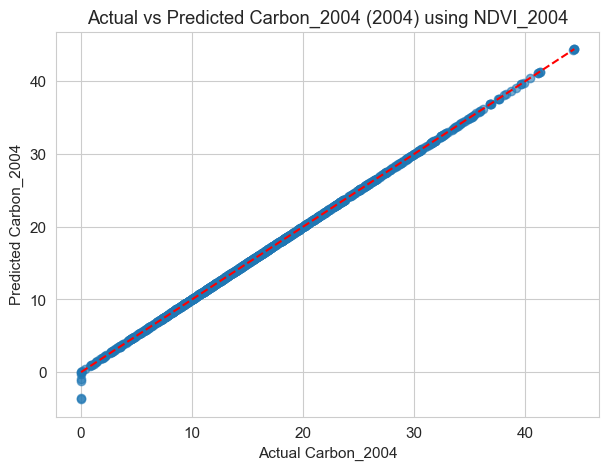


Regression Summary for Biomass_2004 ~ NDVI_2004 (2004):
                            OLS Regression Results                            
Dep. Variable:           Biomass_2004   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.293e+06
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:08:12   Log-Likelihood:                -319.11
No. Observations:                1172   AIC:                             642.2
Df Residuals:                    1170   BIC:                             652.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

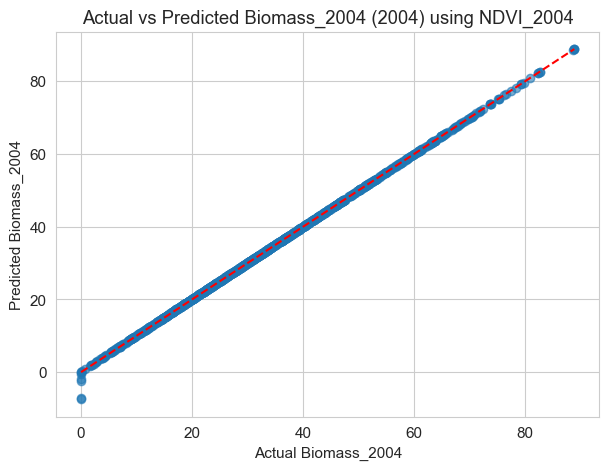


Regression Summary for Carbon_2014 ~ NDVI_2014 (2014):
                            OLS Regression Results                            
Dep. Variable:            Carbon_2014   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.029e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:08:14   Log-Likelihood:                -3059.5
No. Observations:                1172   AIC:                             6123.
Df Residuals:                    1170   BIC:                             6133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

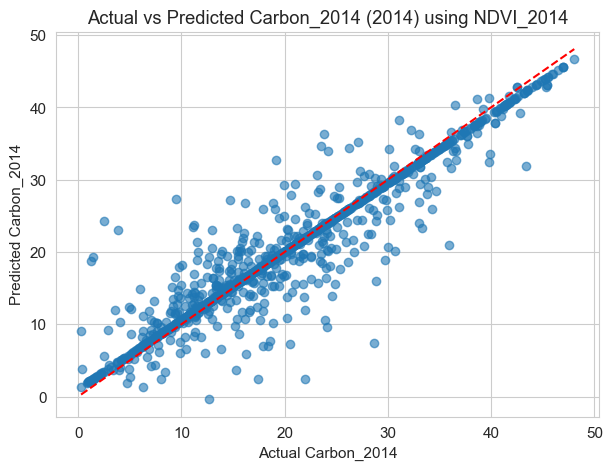


Regression Summary for Biomass_2014 ~ NDVI_2014 (2014):
                            OLS Regression Results                            
Dep. Variable:           Biomass_2014   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 1.029e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:08:15   Log-Likelihood:                -3871.9
No. Observations:                1172   AIC:                             7748.
Df Residuals:                    1170   BIC:                             7758.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

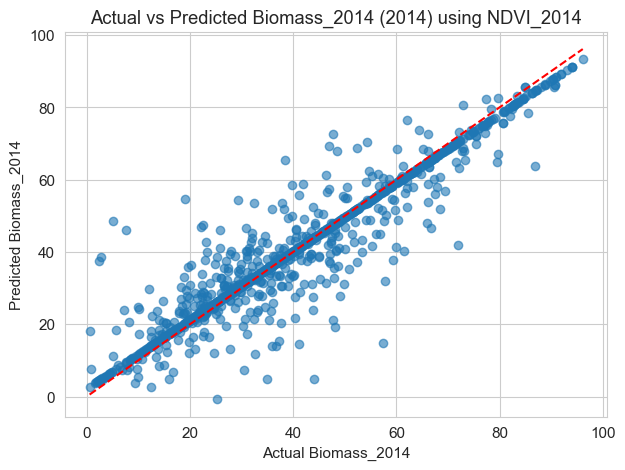


Regression Summary for Carbon_2024 ~ NDVI_2024 (2024):
                            OLS Regression Results                            
Dep. Variable:            Carbon_2024   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     9727.
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:08:16   Log-Likelihood:                -3019.7
No. Observations:                1172   AIC:                             6043.
Df Residuals:                    1170   BIC:                             6054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

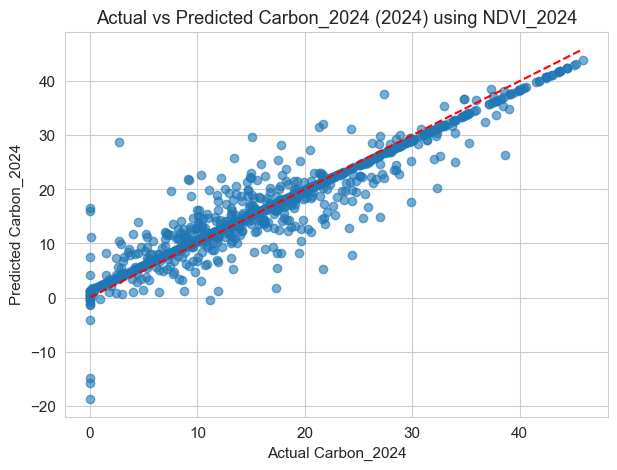


Regression Summary for Biomass_2024 ~ NDVI_2024 (2024):
                            OLS Regression Results                            
Dep. Variable:           Biomass_2024   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     9727.
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:08:18   Log-Likelihood:                -3832.1
No. Observations:                1172   AIC:                             7668.
Df Residuals:                    1170   BIC:                             7678.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

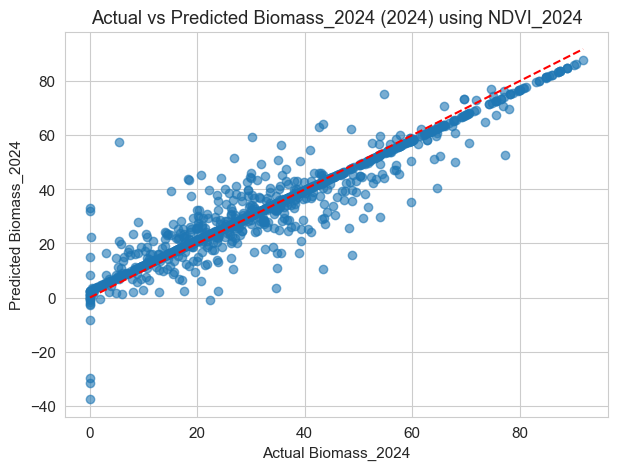

In [79]:
import statsmodels.api as sm

# Function to run regression
def run_regression(year, dep_var, indep_var):
    X = sm.add_constant(df[indep_var])  # add intercept
    y = df[dep_var]
    model = sm.OLS(y, X).fit()
    
    # Print summary
    print(f"\nRegression Summary for {dep_var} ~ {indep_var} ({year}):")
    print(model.summary())
    
    # Save summary
    with open(f"regression_summary_{year}_{dep_var}.txt", "w") as f:
        f.write(model.summary().as_text())
    
    # Plot actual vs predicted
    plt.figure(figsize=(7, 5))
    plt.scatter(y, model.predict(), alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel(f"Actual {dep_var}")
    plt.ylabel(f"Predicted {dep_var}")
    plt.title(f"Actual vs Predicted {dep_var} ({year}) using {indep_var}")
    plt.savefig(f"regression_scatter_{year}_{dep_var}.png", dpi=300)
    plt.show()

# Run regressions for each year
for year in [2004, 2014, 2024]:
    run_regression(year, f"Carbon_{year}", f"NDVI_{year}")   # NDVI → Carbon
    run_regression(year, f"Biomass_{year}", f"NDVI_{year}")  # NDVI → Biomass
